MLP to classifier 

In [86]:
%matplotlib inline

In [87]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import transforms 

In [88]:
fashMNIST = keras.datasets.fashion_mnist

In [89]:
(xTrainFull,yTrainFull),(xTest, yTest) = fashMNIST.load_data()

In [90]:
xTrainFull.shape, yTrainFull.dtype

((60000, 28, 28), dtype('uint8'))

#### First Tasks:
- create a validation/dev set
- scale features for gradient Descent

In [91]:
xValidation, xTrain = xTrainFull[:5000]/255, xTrainFull[5000:]/255
yValidation, yTrain = yTrainFull[:5000], yTrainFull[5000:]

In [92]:
xTest = xTest/255

###### Have a look at the data

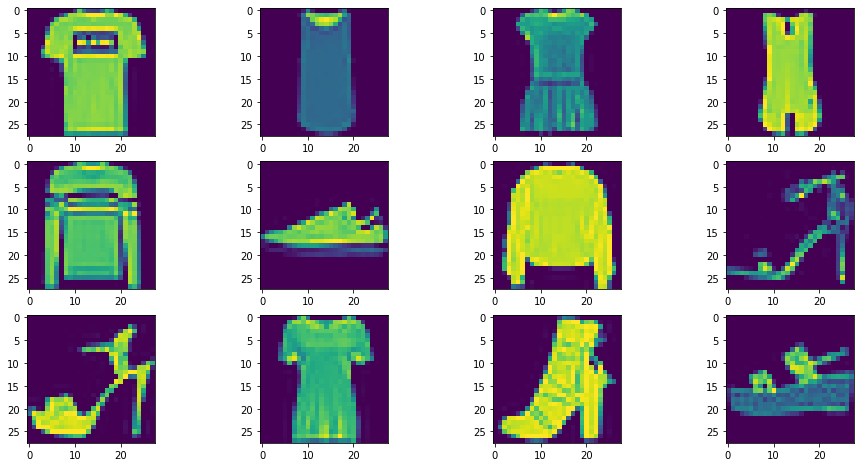

In [102]:
trans = transforms.ToPILImage()
w=10
h=10
fig=plt.figure(figsize=(16, 8))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    img = trans(xTrainFull[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()